Name : Jainam Rajput

SAP ID : 60009200022

Div/Batch : K/K1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## First Dataset - Indian Exchange

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

df = pd.read_csv('/content/India_Exchange_Rate_Dataset.csv',parse_dates=True)
df['observation_date'] = pd.to_datetime(df['observation_date'])
df['month'] = df['observation_date'].dt.strftime('%b')
df['year'] = [d.year for d in df.observation_date]
df['month'] = [d.strftime('%b') for d in df.observation_date]
years = df['year'].unique()

In [ ]:
df.head()

,observation_date,EXINUS,month,year
0,1973-01-01,8.0041,Jan,1973
1,1973-01-02,7.7538,Jan,1973
2,1973-01-03,7.5465,Jan,1973
3,1973-01-04,7.5462,Jan,1973
4,1973-01-05,7.4927,Jan,1973


### Multiple Box Plots

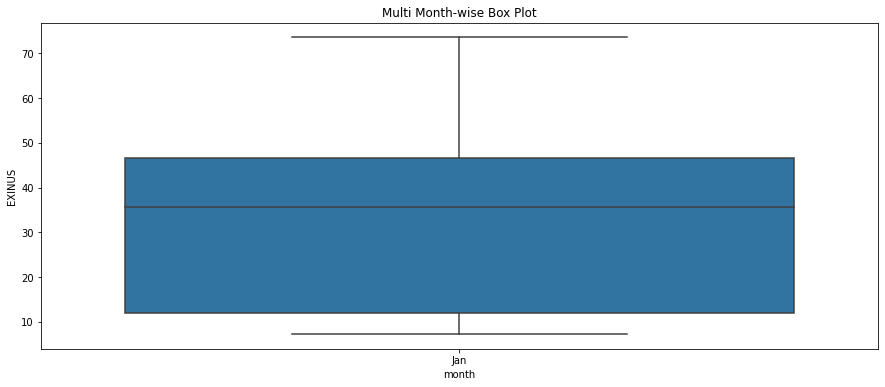

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x='month', y='EXINUS', data=df).set_title("Multi Month-wise Box Plot")
plt.show()

### Seasonality Using Autocorrelation plot

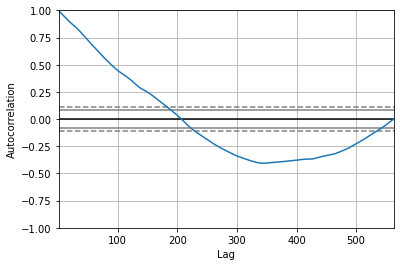

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df.EXINUS.tolist())

### Deseasoning the time series

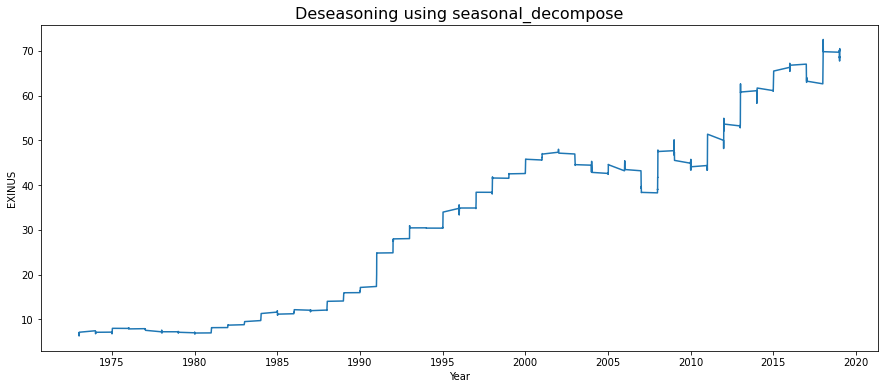

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv(r'/content/India_Exchange_Rate_Dataset.csv', index_col=0,parse_dates=True)
result_mul = seasonal_decompose(df['EXINUS'], model='multiplicative',freq=6)
deseason = df['EXINUS'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS')
plt.show()

### Seasonal Decomposition 

#### Additive

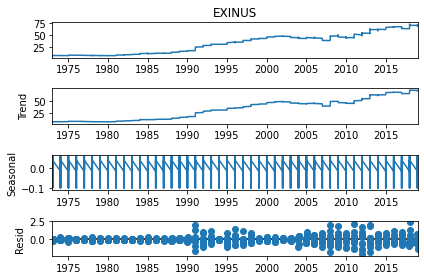

In [ ]:
result = seasonal_decompose(df['EXINUS'], model='add',freq=6) 
result.plot();

#### Multiplicative

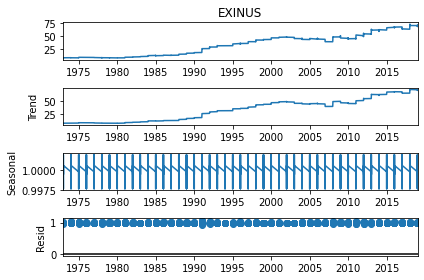

In [ ]:
result = seasonal_decompose(df['EXINUS'], model='mul',freq=6) 
result.plot();

## Second Dataset - Daily-Min-Temperatures

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

df1 = pd.read_csv(r'/content/daily-min-temperatures.csv',parse_dates=True)
df1['Date'] = pd.to_datetime(df1['Date'])
df1['month'] = df1['Date'].dt.strftime('%b')
df1['year'] = [d.year for d in df1.Date]
df1['month'] = [d.strftime('%b') for d in df1.Date]
years = df1['year'].unique()

### Multiple Box Plots

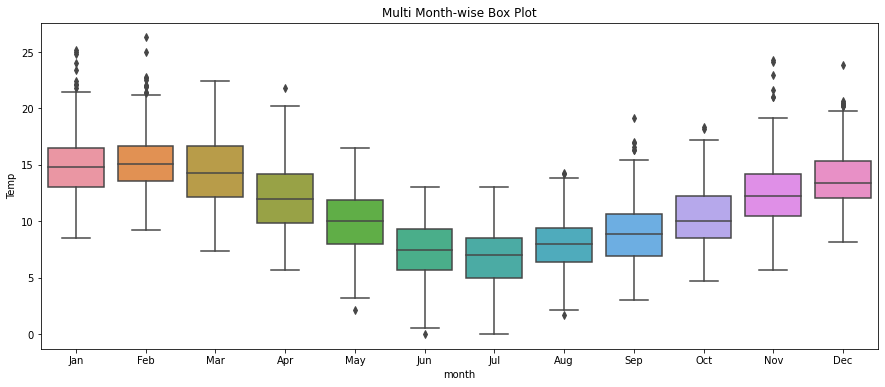

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x='month', y='Temp', data=df1).set_title("Multi Month-wise Box Plot")
plt.show()

### Seasonality Using Autocorrelative Plot

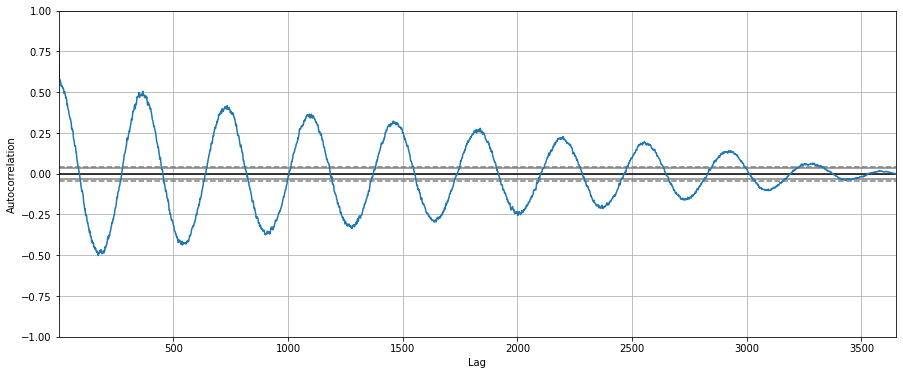

In [ ]:
df1 = pd.read_csv(r'/content/daily-min-temperatures.csv', index_col=0,parse_dates=True)
plt.rcParams.update({'figure.figsize':(15,6)})
autocorrelation_plot(df1.Temp.tolist())

### Deseasoning a Time Series

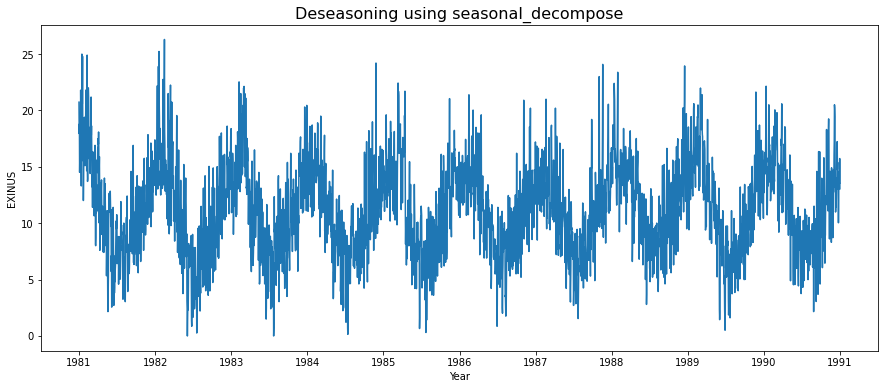

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
df1 = pd.read_csv(r'/content/daily-min-temperatures.csv', index_col=0,parse_dates=True)
result_mul = seasonal_decompose(df1['Temp'], model='additive',freq=6)
deseason = df1['Temp'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS')
plt.show()

### Seasonal Decomposition 

#### Scratch

In [ ]:
df1 = pd.read_csv(r'/content/daily-min-temperatures.csv',parse_dates=True)

In [ ]:
temp = df1['Temp']

In [ ]:
print(temp)

0       20.7
1       17.9
2       18.8
3       14.6
4       15.8
        ... 
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, Length: 3650, dtype: float64


In [ ]:
temp.shape

(3650,)

In [ ]:
Trend = temp * 2.75

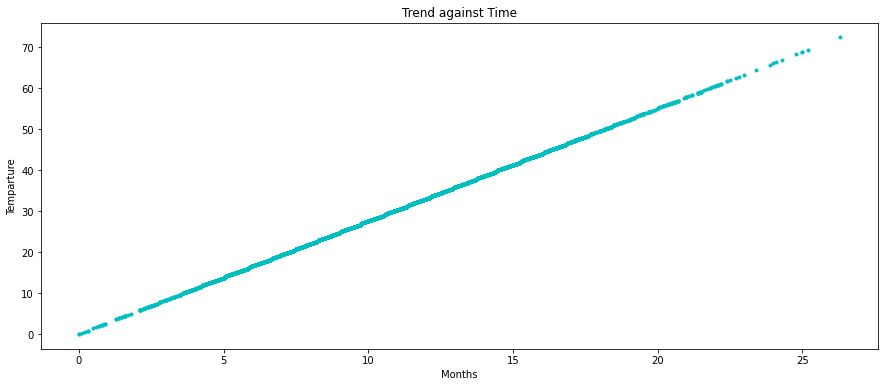

In [ ]:
plt.plot(temp, Trend, 'c.')
plt.title("Trend against Time")
plt.xlabel("Months")
plt.ylabel("Temparture");

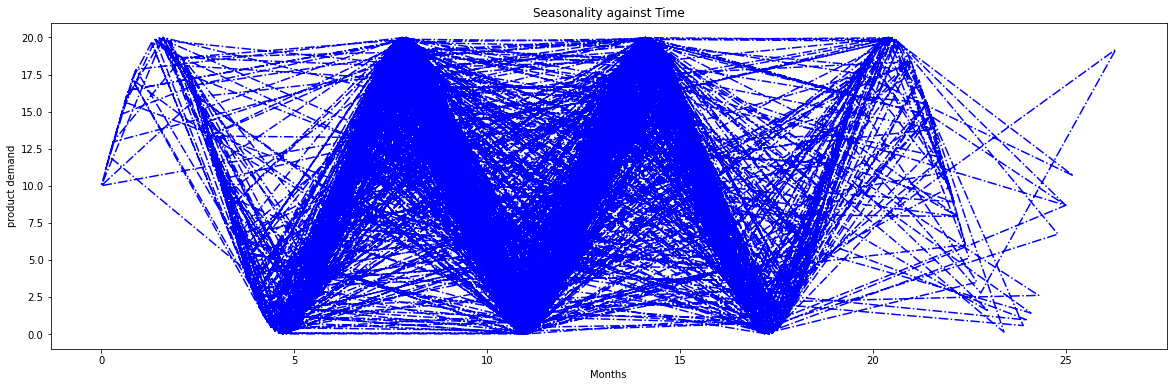

In [ ]:
# creating the seasonality component
seasonality = 10 + np.sin(temp) * 10

#plot the seasonality trend
plt.figure(figsize=(20, 6))
plt.plot(temp,  seasonality, 'b-.')
plt.title("Seasonality against Time")
plt.xlabel("Months")
plt.ylabel("product demand");

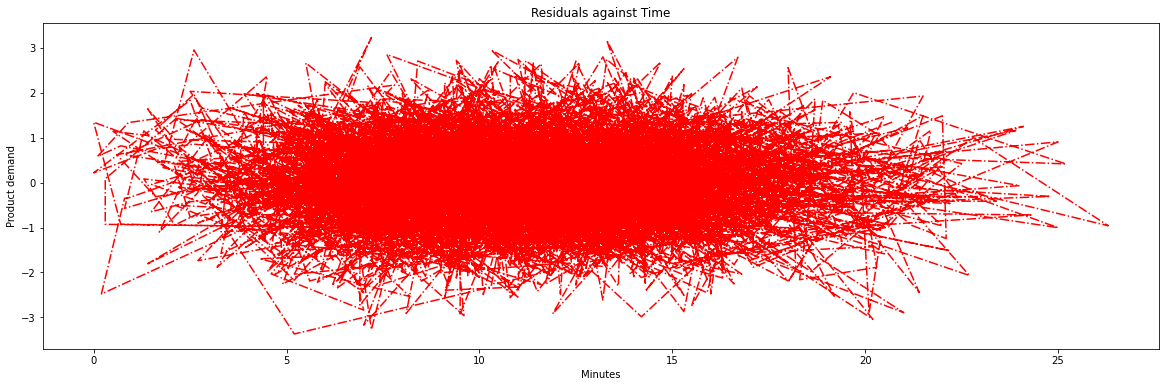

In [ ]:
residual = np.random.normal(loc=0.0, scale=1, size=len(temp))
# print(close)
# print(residual)
#plot the residual component 
plt.figure(figsize=(20,6))
plt.plot(temp, residual, 'r-.')
plt.title("Residuals against Time")
plt.xlabel("Minutes")
plt.ylabel("Product demand");

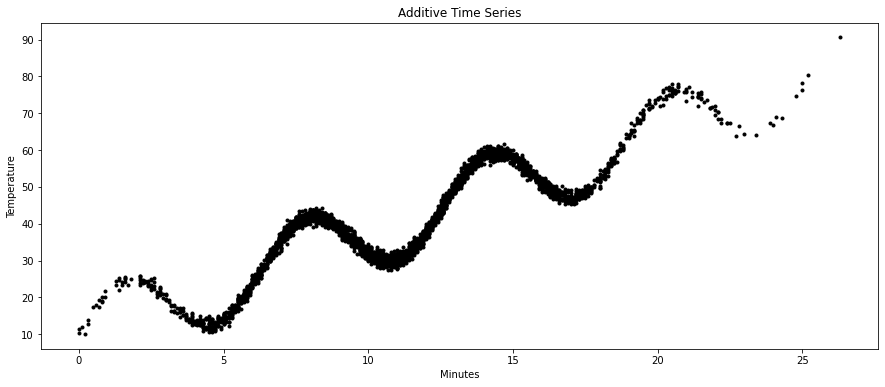

In [ ]:
additive_Tmodel = Trend + seasonality + residual

#Plot the additive model
plt.plot(temp, additive_Tmodel, 'k.')
plt.title("Additive Time Series")
plt.xlabel("Minutes")
plt.ylabel("Temperature"); 

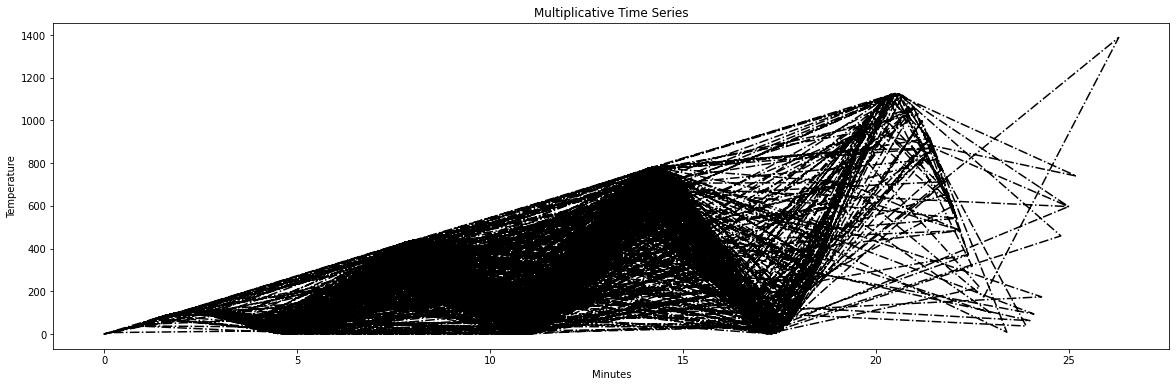

In [ ]:
ignored_residual = np.ones_like(residual)
# we multiply other components to create a multiplicative time series
multiplicative_Tmodel = Trend * seasonality * ignored_residual

#Plot the multiplicative model
plt.figure(figsize=(20,6))
plt.plot(temp, multiplicative_Tmodel, 'k-.')
plt.title("Multiplicative Time Series")
plt.xlabel("Minutes")
plt.ylabel("Temperature");


#### Using Libraries

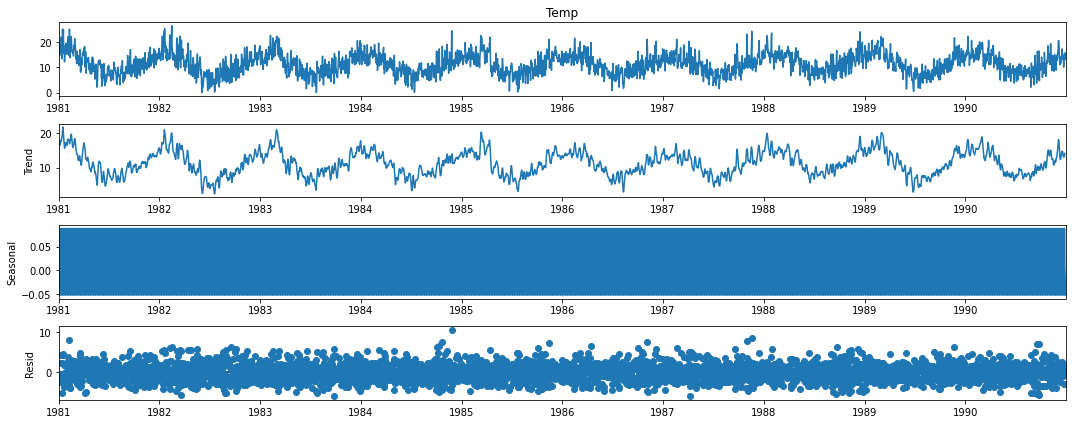

In [ ]:
df1 = pd.read_csv(r'/content/daily-min-temperatures.csv',index_col=0,parse_dates=True)

result = seasonal_decompose(df1['Temp'], model='add',freq=6) 
result.plot();

## Third Dataset - Facebook Dataset

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

df = pd.read_csv('/content/FB.csv',parse_dates=True)
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.strftime('%b')
df['year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]
years = df['year'].unique()

In [ ]:
df.head()

,Date,ID,Close,Low,High,Volume,C(t-5),C(t-4),C(t-3),C(t-2),...,HIS,DAX,AORD,N100,N225,SP500,SSE,Closing_Direction,month,year
0,2012-09-07,41099,31.730000,31.260000,31.900000,10945600,31.10,30.77,31.20,31.47,...,0,0,0,0,0,0,0,1,Sep,2012
1,2012-10-07,41100,32.169998,31.990000,32.880001,17785200,30.77,31.20,31.47,31.73,...,0,1,0,1,0,0,0,0,Oct,2012
2,2012-11-07,41101,31.469999,31.160000,32.480000,14269500,31.20,31.47,31.73,32.17,...,1,1,0,0,0,0,1,0,Nov,2012
3,2012-12-07,41102,30.969999,30.549999,31.559999,13030300,31.47,31.73,32.17,31.47,...,0,0,0,0,0,0,1,0,Dec,2012
4,2012-07-13,41103,30.809999,30.600000,31.400000,11300700,31.73,32.17,31.47,30.97,...,1,1,1,1,1,0,1,0,Jul,2012


### Multiple Box Plots

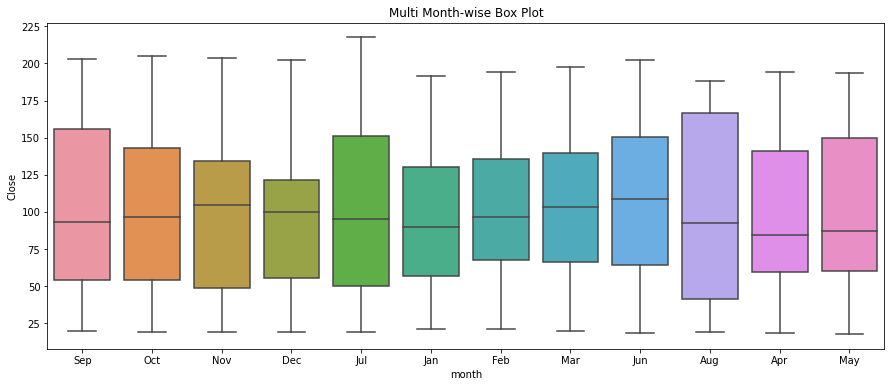

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x='month', y='Close', data=df).set_title("Multi Month-wise Box Plot")
plt.show()

### Seasonalising Using Autocorrelation Plot

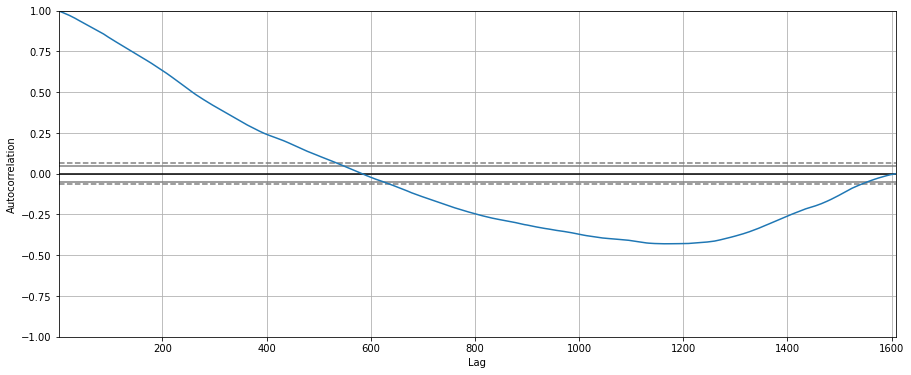

In [ ]:
df = pd.read_csv('/content/FB.csv',index_col=0,parse_dates=True)
plt.rcParams.update({'figure.figsize':(15,6)})
autocorrelation_plot(df.Close.tolist())

### Deseasoning A Time Series

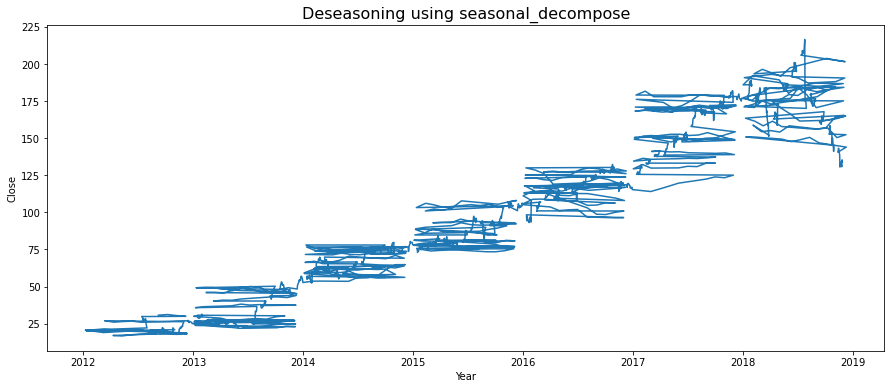

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(df['Close'], model='multiplicative',freq=6)
deseason = df['Close'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Close')
plt.show()

### Seasonal Decomposition

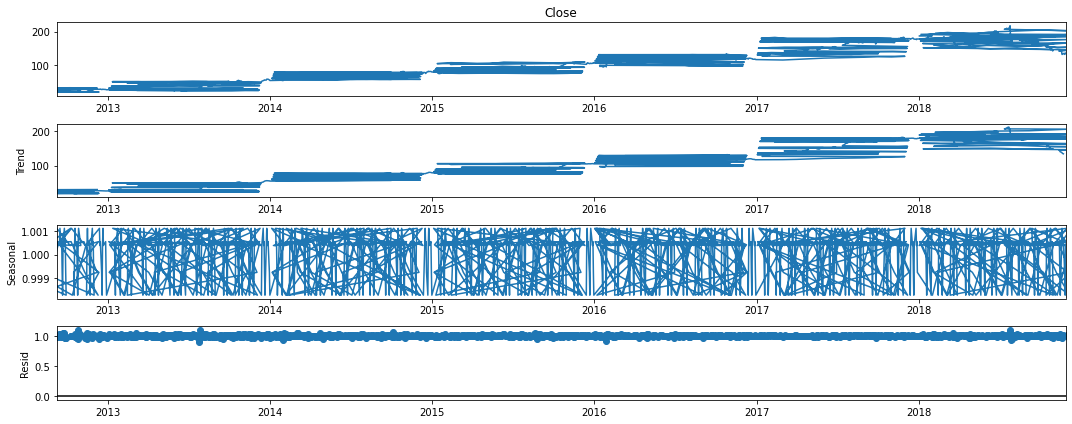

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Close'], model='mul',freq=6) 
result.plot();

## Fourth Dataset - Selected Dataset (House Hold Energy Consumption)

In [ ]:
df = pd.read_csv('/content/D202.csv')
df.head()

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,10/22/2016,0:00,0:14,0.01,kWh,$0.00,NaN
1,Electric usage,10/22/2016,0:15,0:29,0.01,kWh,$0.00,NaN
2,Electric usage,10/22/2016,0:30,0:44,0.01,kWh,$0.00,NaN
3,Electric usage,10/22/2016,0:45,0:59,0.01,kWh,$0.00,NaN
4,Electric usage,10/22/2016,1:00,1:14,0.01,kWh,$0.00,NaN


In [ ]:
df = df.drop(columns=["TYPE", "UNITS", "END TIME", "NOTES"], errors="ignore")

# Converting COST column to float
df["COST"] = df["COST"].str.replace("$", "", regex=False).astype(float)

# Creating timestamp column
add_prefix_lambda = lambda start_time: "0"+ start_time if int(start_time.split(":")[0]) < 12 else start_time
df["START TIME"] = df["START TIME"].apply(add_prefix_lambda)

df["timestamp"] = df["DATE"] + " " + df["START TIME"]
df["timestamp"] = pd.to_datetime(df["timestamp"])

df = df[["timestamp", "USAGE", "COST"]]
df.columns = ["timestamp", "usage", "cost"]

In [ ]:
hourly_usage_df = df.resample("1H", on="timestamp").sum()

# Daily
daily_usage_df = hourly_usage_df.resample("1D").sum()

# Monthly
monthly_usage_df = daily_usage_df.resample("1M").sum()

In [ ]:
display(monthly_usage_df.head())

,usage,cost
timestamp,,
2016-10-31,85.60,15.24
2016-11-30,404.36,73.56
2016-12-31,624.52,122.30
2017-01-31,742.40,145.38
2017-02-28,458.12,85.78


In [ ]:
daily_usage_df.to_csv('Daily_Electricity_Consumption.csv')

In [3]:
df = pd.read_csv('/content/Daily_Electricity_Consumption.csv',parse_dates=True)
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.strftime('%b')
df['year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]
years = df['year'].unique()

### Multiple Box Plots

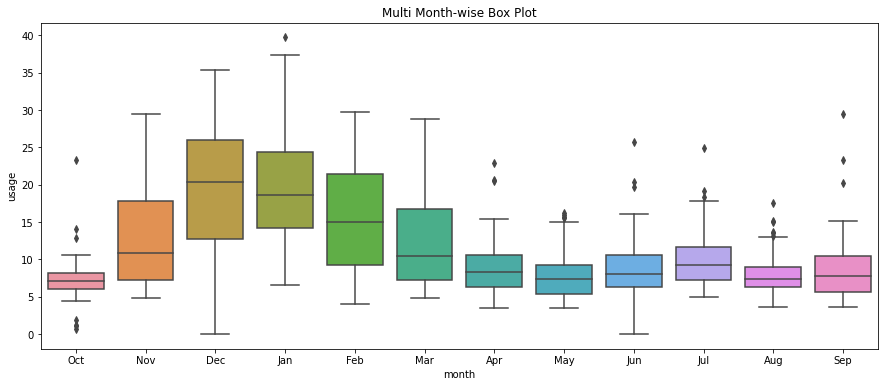

In [4]:
plt.figure(figsize=(15,6))
sns.boxplot(x='month', y='usage', data=df).set_title("Multi Month-wise Box Plot")
plt.show()

### Seasonalising Using Autocorrelation

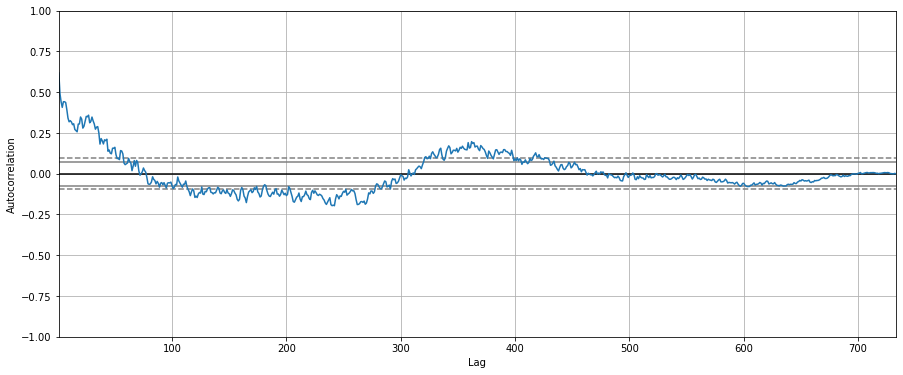

In [6]:
from pandas.plotting import autocorrelation_plot
df = pd.read_csv('/content/Daily_Electricity_Consumption.csv',index_col=0,parse_dates=True)
plt.rcParams.update({'figure.figsize':(15,6)})
autocorrelation_plot(df.usage.tolist())

### Deseasoning the Time Series

<ipython-input-8-326eae4728fc>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result_mul = seasonal_decompose(df['usage'], model='additive',freq=6)


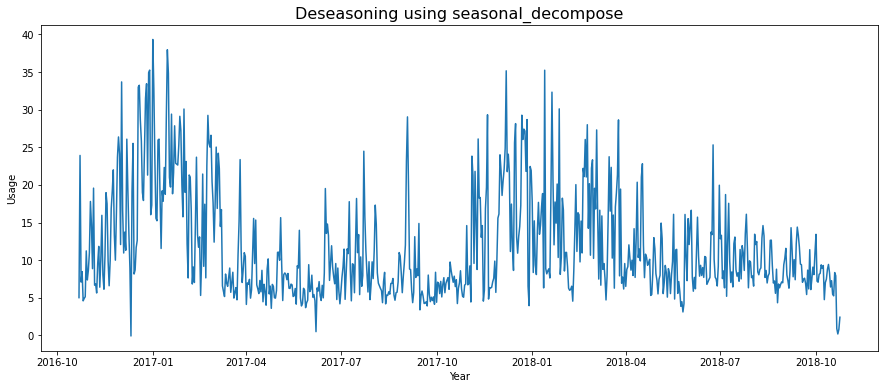

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['usage'], model='additive',freq=6)
deseason = df['usage'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Usage')
plt.show()

### Seasonal Decomposition

Statsmodels’ seasonal decompose method neatly breaks down time series data into components.

<ipython-input-9-972a3c490795>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df['usage'], model='add',freq=6)


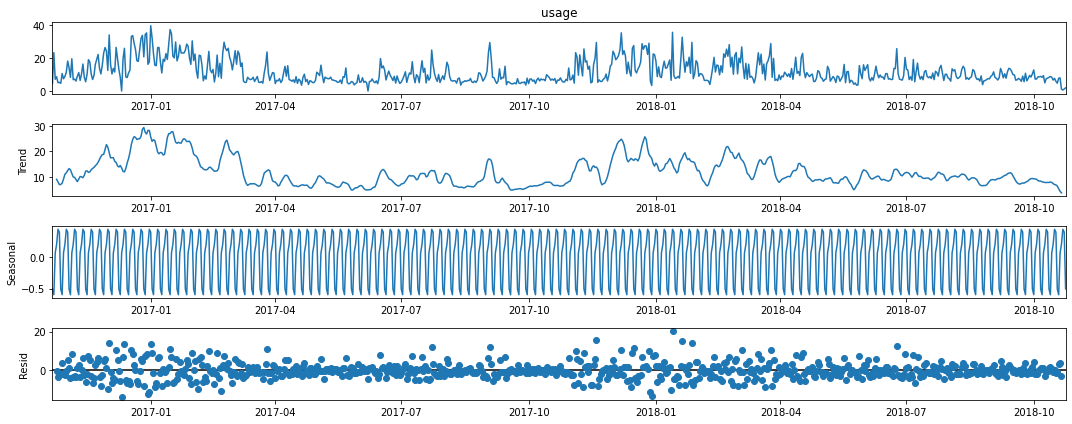

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['usage'], model='add',freq=6) 
result.plot();

From the decomposition we can observe that the Data has non-linear trends and Seasonality 